In [235]:
import numpy as np
import pylab as pl
import pandas as pd
import urllib2
import json
import geopandas as gp
import zipfile
import sklearn.cluster
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
%pylab inline

Populating the interactive namespace from numpy and matplotlib


`%matplotlib` prevents importing * from pylab and numpy


In [236]:
census_years = ['94', '95', '96', '97', '98', '99', '00', '01', '02', '03', 
                '04', '05', '06', '07', '08', '09', '10', '11', '12', '13']
full_years = ['1994', '1995', '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', 
              '2004', '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013']
census_files = []
census_est = {}

for i in census_years:
    file_path = 'zbp%stotals.zip' % i
    census_zip = zipfile.ZipFile(file_path) 
    census_year = pd.read_csv(census_zip.open(file_path.replace('.zip','.txt')))
    census_year.columns = [x.upper() for x in census_year.columns]
    census_year = census_year[['ZIP', 'EST']]
    census_year = census_year.rename(columns = {'EST':i})
    census_files.append(census_year)

census_est[0] = census_files[0]

for i in range(1,20):
    census_est[i] = pd.merge(census_files[i], census_est[i-1], on=['ZIP']) 
    
census_df = census_est[19]
census_df = census_df.set_index('ZIP', drop = True)
census_df = census_df.reindex_axis([['94', '95', '96', '97', '98', '99', '00', '01', '02', '03', 
                                     '04', '05', '06', '07', '08', '09', '10', '11', '12', '13']], axis=1)
census_df.columns = full_years
census_df.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
ZIP,,,,,,,,,,,,,,,,,,,,
1001,439,439,433,457,444,469,493,490,490,505,500,509,509,503,477,458,448,436,453,439
1002,450,467,487,500,490,558,563,587,566,586,584,589,582,596,584,571,570,558,572,572
1003,10,10,13,15,14,13,13,13,15,16,15,12,12,16,17,16,16,16,15,15
1004,47,48,47,41,31,35,48,37,23,21,43,31,30,20,18,18,21,19,16,16
1005,92,95,101,104,95,82,86,90,94,93,97,94,98,106,97,87,96,91,94,97


In [237]:
#Loading GeoJSON file
#zip_url = 'https://nycdatastables.s3.amazonaws.com/2013-08-19T18:18:28.877Z/nyc-zip-code-tabulation-areas-polygons.geojson'
#request = urllib2.urlopen(zip_url)
#zip_data = json.load(request)

#print zip_data

In [238]:
zips = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')
zips = pd.DataFrame({'ZIP': zips['postalCode'].astype(int)}).drop_duplicates().sort('ZIP')

print type(zips.ZIP[1])
print (zips.ZIP[1])

<type 'numpy.int64'>
11004


In [239]:
census_df.to_csv('census.csv')

In [240]:
test = pd.read_csv('census.csv')

In [241]:
print test.columns
print type(test.ZIP[1])
print (test.ZIP[1])

Index([u'ZIP', u'1994', u'1995', u'1996', u'1997', u'1998', u'1999', u'2000',
       u'2001', u'2002', u'2003', u'2004', u'2005', u'2006', u'2007', u'2008',
       u'2009', u'2010', u'2011', u'2012', u'2013'],
      dtype='object')
<type 'numpy.int64'>
1002


In [291]:
cleanfile = pd.merge(test, zips, on=['ZIP'])

print cleanfile.shape
#print cleanfile

(230, 21)


In [276]:
clean_matrix = cleanfile.as_matrix()
clean_matrix.shape
print clean_matrix

[[10001  6999  7088 ...,  7227  7235  7273]
 [10002  1784  1819 ...,  2912  2954  2988]
 [10003  3256  3377 ...,  4159  4214  4277]
 ..., 
 [11693    95    90 ...,   131   129   127]
 [11694   294   285 ...,   326   326   327]
 [11697    33    32 ...,    46    49    40]]


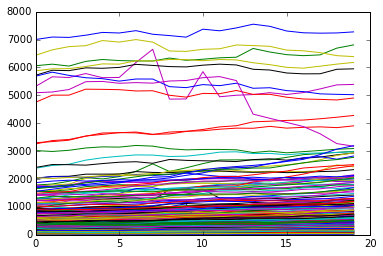

In [329]:
for i in range(len(clean_matrix)):
    pl.plot(clean_matrix[i,1:])

In [327]:
# fig = plt.figure()
# ax = fig.add_subplot(1,10,1)
# ax.set_aspect('equal')
# plt.imshow(clean_matrix)
# plt.colorbar()
# plt.show()
# for j in  range(len(clean_matrix)):
#     #print " Next zip code"
#     for i in xrange(0,20):
#         #print clean_matrix[j][i+1]
#         pl.plot(1993,clean_matrix[0][i], '-', color='red', linewidth=0.3)
# #pl.plot(clean_matrix[2], clean_matrix[i], '-', color='black', linewidth=0.3)
# #pl.plot(clean_matrix[5], clean_matrix[i], '-', color='gray', linewidth=0.3)

In [328]:
# for i in range(len(clean_matrix)):
#     pl.plot(clean_matrix[i], clean_matrix[0], '-', color='gray', linewidth=0.3)

In [330]:
standard_data = np.zeros(clean_matrix.shape)

for i in range(len(clean_matrix)):
    standard_data[i] = stats.zscore(clean_matrix[i])
    
print standard_data.shape
#print standard_data.mean(axis=1)
#print standard_data.std(axis=1)

(230, 21)


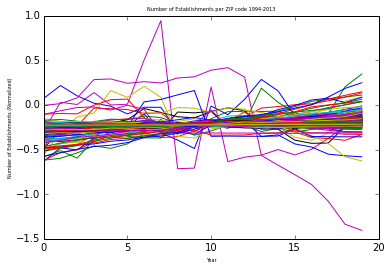

In [337]:
for i in range(len(standard_data)):
    pl.plot(standard_data[i,1:])

pl.xlabel("Year", fontsize=5)
pl.ylabel("Number of Establishments (Normalized)", fontsize=5)
pl.title("Number of Establishments per ZIP code 1994-2013", fontsize=5)

In [338]:
import scipy as sc
from scipy import stats

In [339]:
#K-means clustering; k=3
kmeans3 = KMeans(n_clusters=3, n_init=100)
kmeans3.fit(census_matrix)
labels3 = kmeans3.labels_

#Calculating cluster centers
kc3_d = np.zeros((3,230))
kc3_m = np.zeros((3,230,20))
kc3 = np.zeros((3,20))

for k in range(3):
    
    for i in range(230):
        if labels3[i] == k:
            kc3_d[k][i] = 1
        else:
            kc3_d[k][i] = 0

    for a in range(20):        
        for b in range(230):
            kc3_m[k][b][a] = kc3_d[k][b]*census_matrix[b][a]

    for i in range(20):
        kc3[k][i] = map(sum, kc3_m[k].transpose())[i]/kc3_d[k].sum()

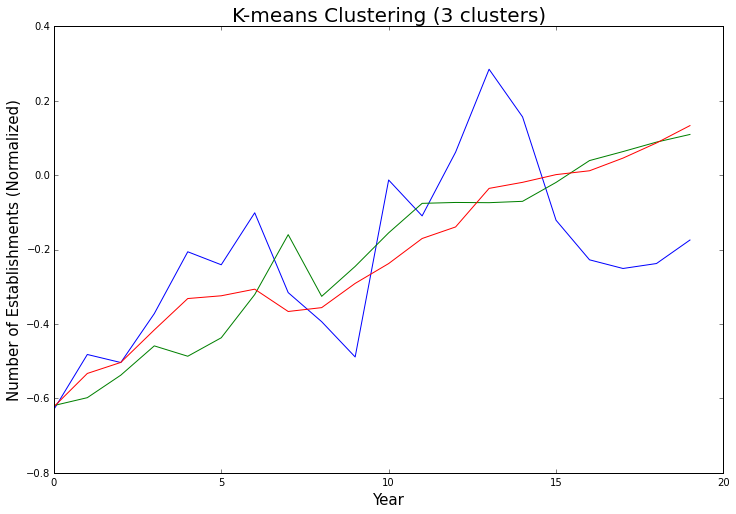

In [343]:
colormap = ['orange', 'mediumseagreen', 'dodgerblue', 'black', 'slategrey']

pl.figure(figsize=(12, 8))
#for i in range(len(standard_data)):
    #pl.plot(standard_data[i,1:])
for i in range(3):
    pl.plot(standard_data[i,1:])

#xlim(1994,2013)
pl.xlabel("Year", fontsize=15)
pl.ylabel("Number of Establishments (Normalized)", fontsize=15)
pl.title("K-means Clustering (3 clusters)", fontsize=20)

In [ ]:
#K-means clustering; k=5

kmeans5 = KMeans(n_clusters=5, n_init=100)
kmeans5.fit(census_norm)
labels5 = kmeans5.labels_

#Calculating cluster centers
kc5_d = np.zeros((5,230))
kc5_m = np.zeros((5,230,20))
kc5 = np.zeros((5,20))

for k in range(5):
    
    for i in range(230):
        if labels5[i] == k:
            kc5_d[k][i] = 1
        else:
            kc5_d[k][i] = 0

    for a in range(20):        
        for b in range(230):
            kc5_m[k][b][a] = kc5_d[k][b]*census_norm[b][a]

    for i in range(20):
        kc5[k][i] = map(sum, kc5_m[k].transpose())[i]/kc5_d[k].sum()
        
print kmeans5.labels_
print len(kmeans5.labels_)

In [ ]:
pl.figure(figsize=(12, 8))
for i in range(len(census_matrix)):
    #pl.plot(full_years, standard_data[i], '-', color=colormap[labels5[i]], linewidth=0.3)
    xlim(1994,2013)
    ylim(-4.5,4.5)
for i in range(5):
    pl.plot(full_years, kc5[i], '-', color=colormap[i], linewidth=3)
xlim(1994,2013)
ylim(-4,4.25)
pl.xlabel("Year", fontsize=15)
pl.ylabel("Number of Establishments (Normalized)", fontsize=15)
pl.title("K-means clustering - 5 clusters", fontsize=20)

In [ ]:
nyc_map = gp.read_file('nyc-zip-code-tabulation-areas-polygons.geojson')

km_column = pd.DataFrame(columns=('postalCode', 'km_cluster'))
#ag_column = pd.DataFrame(columns=('postalCode', 'ag_cluster'))

km_column['postalCode'] = census_df.index.astype(str)
km_column['km_cluster'] = labels5
#ag_column['postalCode'] = census_df.index.astype(str) 
#ag_column['ag_cluster'] = labelsag

nyc_map = pd.merge(nyc_map, km_column, on=['postalCode']) 
nyc_map = pd.merge(nyc_map, ag_column, on=['postalCode'])

In [ ]:
pl.figure(figsize=(20, 20))
nyc_map.plot(column='km_cluster', alpha=1, colormap='YlOrRd')
pl.title("K-means Clustering (4 clusters)", fontsize=20)
pl.xlabel('longitude', fontsize = 15)
pl.ylabel('latitude', fontsize = 15)